# Junior/Intern Data Scientist-Machine Learning Engineering Positions

By: [Fernanda Arizbeth Borjas Orduño](https://www.linkedin.com/in/fernanda-borjas-ordu%C3%B1o-033067166/)

## Data Wrangling + Exploration

Set of 4 questions to be solved with two [data sets](http://www.datatur.sectur.gob.mx/):
- Histórico de turismo en México (2016-2021).
- Pueblos mágicos de México.

First, it is important to upload the necessary libraries for the exercise:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pycountry
import unidecode
import plotly.express as px
import requests
import matplotlib.pyplot as plt 

Then, upload the files needed for analysis:

In [2]:
df_pueblos = pd.read_csv('pueblos_magicos.csv')
df_turismo = pd.read_csv('turismo_mexico.csv')

### 1. Exploratory Data Analysis: 
What were the ten Pueblos mágicos with the most population in 2015? What were the ten Pueblos mágicos with the least population in 2010? Data set: Pueblos mágicos de México.

In [4]:
df_pueblos_ord_2015 = df_pueblos.sort_values('pob_2015',ascending = False)
df_pueblos_ord_2010 = df_pueblos.sort_values('pob_2010',ascending = False)

In [5]:
print('The ten Pueblos mágicos with the most population in 2015 were:')
print(df_pueblos_ord_2015['pueblo_magico'].head(10).to_string(index=False))

The ten Pueblos mágicos with the most population in 2015 were:
                  Tlaquepaque
                       La Paz
                      Metepec
   San Cristóbal de las Casas
                    Guadalupe
                     Papantla
         Comitán de Domínguez
              Lagos de Moreno
           San Andrés Cholula
 Bahía de Banderas (Sayulita)


In [6]:
print('The ten Pueblos mágicos with the least population in 2010 were:')
print(df_pueblos_ord_2010['pueblo_magico'].tail(10).to_string(index=False))

The ten Pueblos mágicos with the least population in 2010 were:
                 Mineral del Chico
                San José de Gracia
           San Sebastián del Oeste
           Teúl de González Ortega
 San Pedro y San Pablo Teposcolula
                              Mier
                        Bustamante
                          Guerrero
                           Candela
              Capulálpam de Méndez


Let's visualize the population by Pueblo mágico in 2010 and 2015.

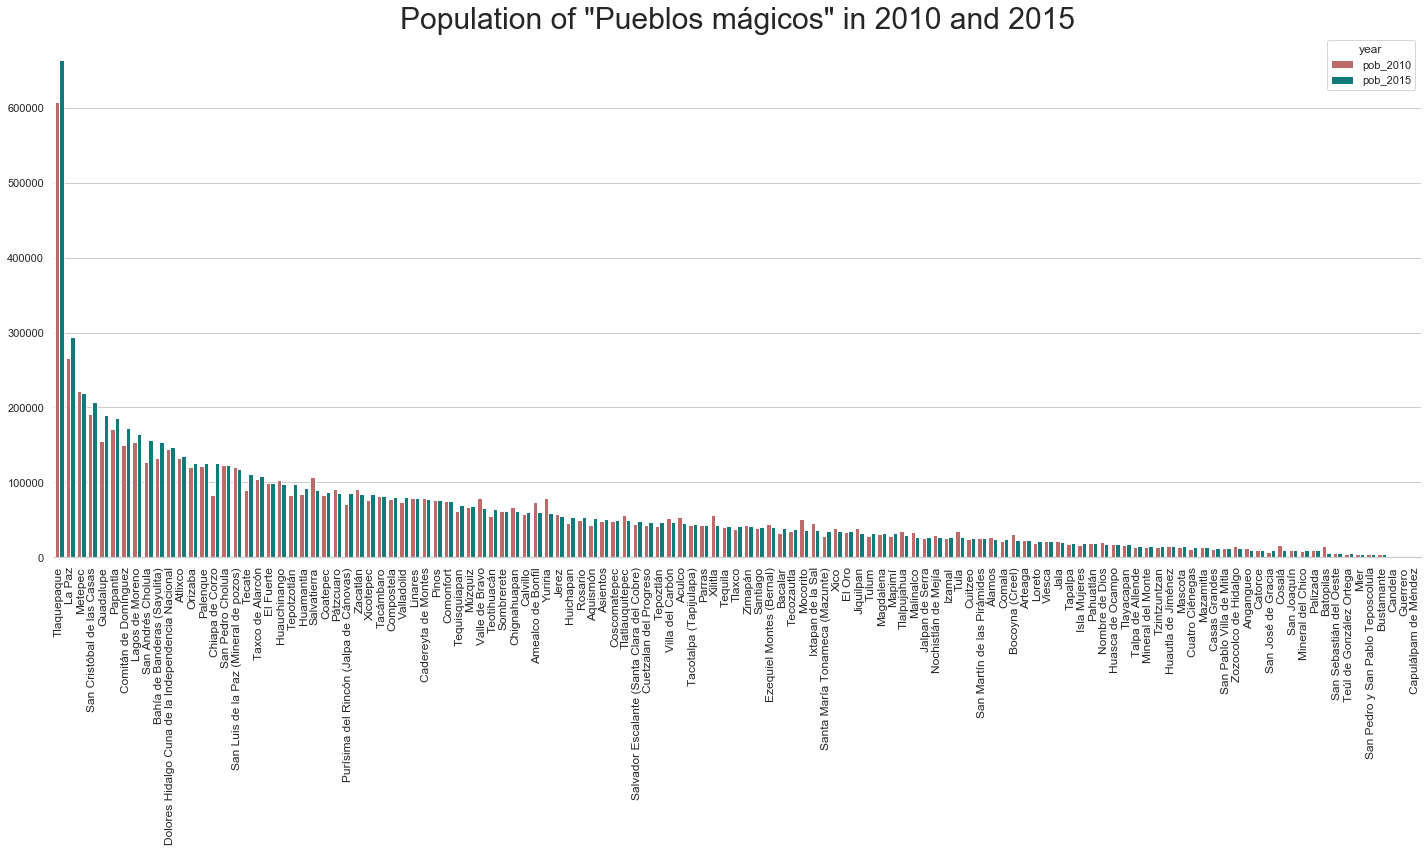

In [7]:
new_df = pd.melt(df_pueblos_ord_2015, id_vars =['pueblo_magico'], value_vars =['pob_2010', 'pob_2015'], var_name='year', value_name='population')

#plt.rcParams['figure.dpi'] = 300
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20,12))
fig.set_tight_layout(True)
p = sns.barplot(x='pueblo_magico', y='population', hue='year', data=new_df, palette=['indianred','darkcyan'])
plt.title('Population of "Pueblos mágicos" in 2010 and 2015', fontsize = 30);
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90, fontsize = 12)
sns.despine(left=True)
#plt.savefig('Population_pueblos.png')
plt.show()

### 2. Data Wrangling: 
Change Mexico states full name for the three characters ISO convention. Store it in a variable called: estado_iso. After that, display the new variable’s unique values. Use the following table as a reference. Data set: Pueblos mágicos de México.

First, it is important to check that the dataset contains all the states written in a uniform and homogeneous way.

In [8]:
print(df_pueblos['estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Durango' 'Guanajuato'
 'Guerrero' 'Hidalgo' 'Jalisco' 'Mexico' 'Michoacan' 'Morelos' 'Nayarit'
 'Nuevo Leon' 'Oaxaca' 'Puebla' 'Queretaro' 'Quintana Roo'
 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco' 'Tamaulipas' 'Tlaxcala'
 'Veracruz' 'Yucatan' 'Zacatezas' 'Zacatecas']


It can be seen that the state of "Zacatecas" is misspelled in some rows, so it is replaced by the correct name.

In [9]:
df_pueblos['estado'] = df_pueblos['estado'].replace(to_replace = 'Zacatezas', value = 'Zacatecas')
print(df_pueblos['estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Durango' 'Guanajuato'
 'Guerrero' 'Hidalgo' 'Jalisco' 'Mexico' 'Michoacan' 'Morelos' 'Nayarit'
 'Nuevo Leon' 'Oaxaca' 'Puebla' 'Queretaro' 'Quintana Roo'
 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco' 'Tamaulipas' 'Tlaxcala'
 'Veracruz' 'Yucatan' 'Zacatecas']


Once the mistake has been corrected, the ISO names of the states of Mexico are obtained. This can be done by using the "pycountry" library.

In [10]:
#Get the ISO codes for Mexico subdivisions
div_MX = list(pycountry.subdivisions.get(country_code='MX'))

#Create a dataframe with the names and codes of the states
df_names = pd.DataFrame(columns = ['code', 'name'])
for i in range(len(div_MX)):
    code = div_MX[i].code.split('-')[1]
    name = unidecode.unidecode(div_MX[i].name)
    
    df_names.loc[i] = [code, name]

Let's see the dataframe with the ISO codes and names for Mexico subdivisions obtained from pycountry:

In [11]:
print(df_names.to_string(index=False))

code                             name
 DUR                          Durango
 QUE                        Queretaro
 GRO                         Guerrero
 ROO                     Quintana Roo
 GUA                       Guanajuato
 SIN                          Sinaloa
 AGU                   Aguascalientes
 HID                          Hidalgo
 SLP                  San Luis Potosi
 JAL                          Jalisco
 BCN                  Baja California
 SON                           Sonora
 MEX                           Mexico
 BCS              Baja California Sur
 TAB                          Tabasco
 MIC              Michoacan de Ocampo
 CAM                         Campeche
 TAM                       Tamaulipas
 MOR                          Morelos
 CHH                        Chihuahua
 TLA                         Tlaxcala
 NAY                          Nayarit
 CHP                          Chiapas
 VER  Veracruz de Ignacio de la Llave
 NLE                       Nuevo Leon
 CMX        

We proceed to replace the values that do not match with those of the names of the states in the dataset "pueblos_magicos":

In [12]:
df_names = df_names.replace({'name':{'Michoacan de Ocampo':'Michoacan', 'Coahuila de Zaragoza':'Coahuila',
                                     'Veracruz de Ignacio de la Llave':'Veracruz'}})
df_names['name'].unique()

array(['Durango', 'Queretaro', 'Guerrero', 'Quintana Roo', 'Guanajuato',
       'Sinaloa', 'Aguascalientes', 'Hidalgo', 'San Luis Potosi',
       'Jalisco', 'Baja California', 'Sonora', 'Mexico',
       'Baja California Sur', 'Tabasco', 'Michoacan', 'Campeche',
       'Tamaulipas', 'Morelos', 'Chihuahua', 'Tlaxcala', 'Nayarit',
       'Chiapas', 'Veracruz', 'Nuevo Leon', 'Ciudad de Mexico', 'Yucatan',
       'Coahuila', 'Oaxaca', 'Zacatecas', 'Puebla', 'Colima'],
      dtype=object)

Finally, the "iso_state" column is created in the "pueblos_magicos" database with the ISO code of each state.

In [13]:
#Create column "estado_iso"
df_pueblos['estado_iso'] = 0

#Fill column "estado_iso" with the ISO codes of each state
for i in range(df_pueblos.shape[0]):
    edo = df_pueblos.iloc[i,1]
    aa = df_names[df_names['name'] == edo]
    df_pueblos.iloc[i,4] = aa.iloc[0,0]

In [14]:
#Display unique values of the variable "estado_iso"
print(df_pueblos['estado_iso'].unique())

['AGU' 'BCN' 'BCS' 'CAM' 'COA' 'COL' 'CHP' 'CHH' 'DUR' 'GUA' 'GRO' 'HID'
 'JAL' 'MEX' 'MIC' 'MOR' 'NAY' 'NLE' 'OAX' 'PUE' 'QUE' 'ROO' 'SLP' 'SIN'
 'SON' 'TAB' 'TAM' 'TLA' 'VER' 'YUC' 'ZAC']


### 3. Analysis:
The leadership team wants to review the historical evolution of International tourism in Mexico. Use the Histórico de turismo en México data set to elaborate an executive summary of a document that depicts the answer to the leadership team’s request. Justify your answers. Data set: Tourism in Mexico over time.

In [15]:
df_turismo['month'] = 0
df_turismo['year'] = 0

for i in range(df_turismo.shape[0]):
    aa = df_turismo.iloc[i,0]
    df_turismo.iloc[i,6] = aa.split('/')[1]
    df_turismo.iloc[i,7] = aa.split('/')[2]

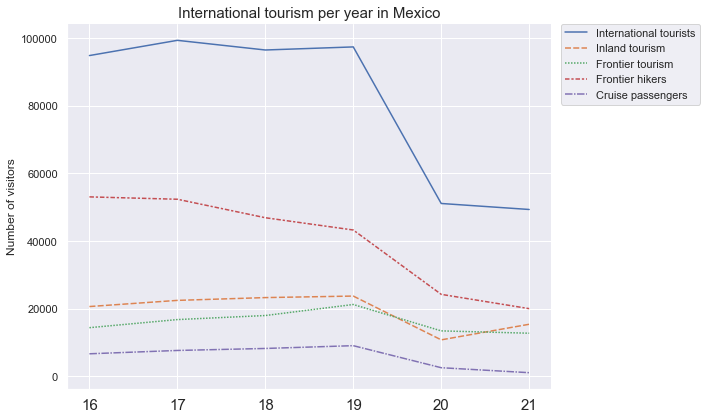

In [17]:
aa = df_turismo.groupby('year')['visitantes_internacionales'].sum().to_frame()
aa = aa.rename(columns = {'visitantes_internacionales': 'International tourists'}, inplace = False)
aa['Inland tourism'] = df_turismo.groupby('year')['turismo_al_interior'].sum()
aa['Frontier tourism'] = df_turismo.groupby('year')['turismo_fronterizo'].sum()
aa['Frontier hikers'] = df_turismo.groupby('year')['excursionistas _fronterizos'].sum()
aa['Cruise passengers'] = df_turismo.groupby('year')['pasajeros_crucero'].sum()


#plt.rcParams['figure.dpi'] = 300
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
sns.lineplot(data=aa)

plt.title('International tourism per year in Mexico', fontsize = 15);
plt.xlabel('')
plt.ylabel('Number of visitors', fontsize = 12)
plt.xticks(fontsize = 15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#plt.savefig('International tourism per year and type.png')
plt.show()

#### Detailed variation over time

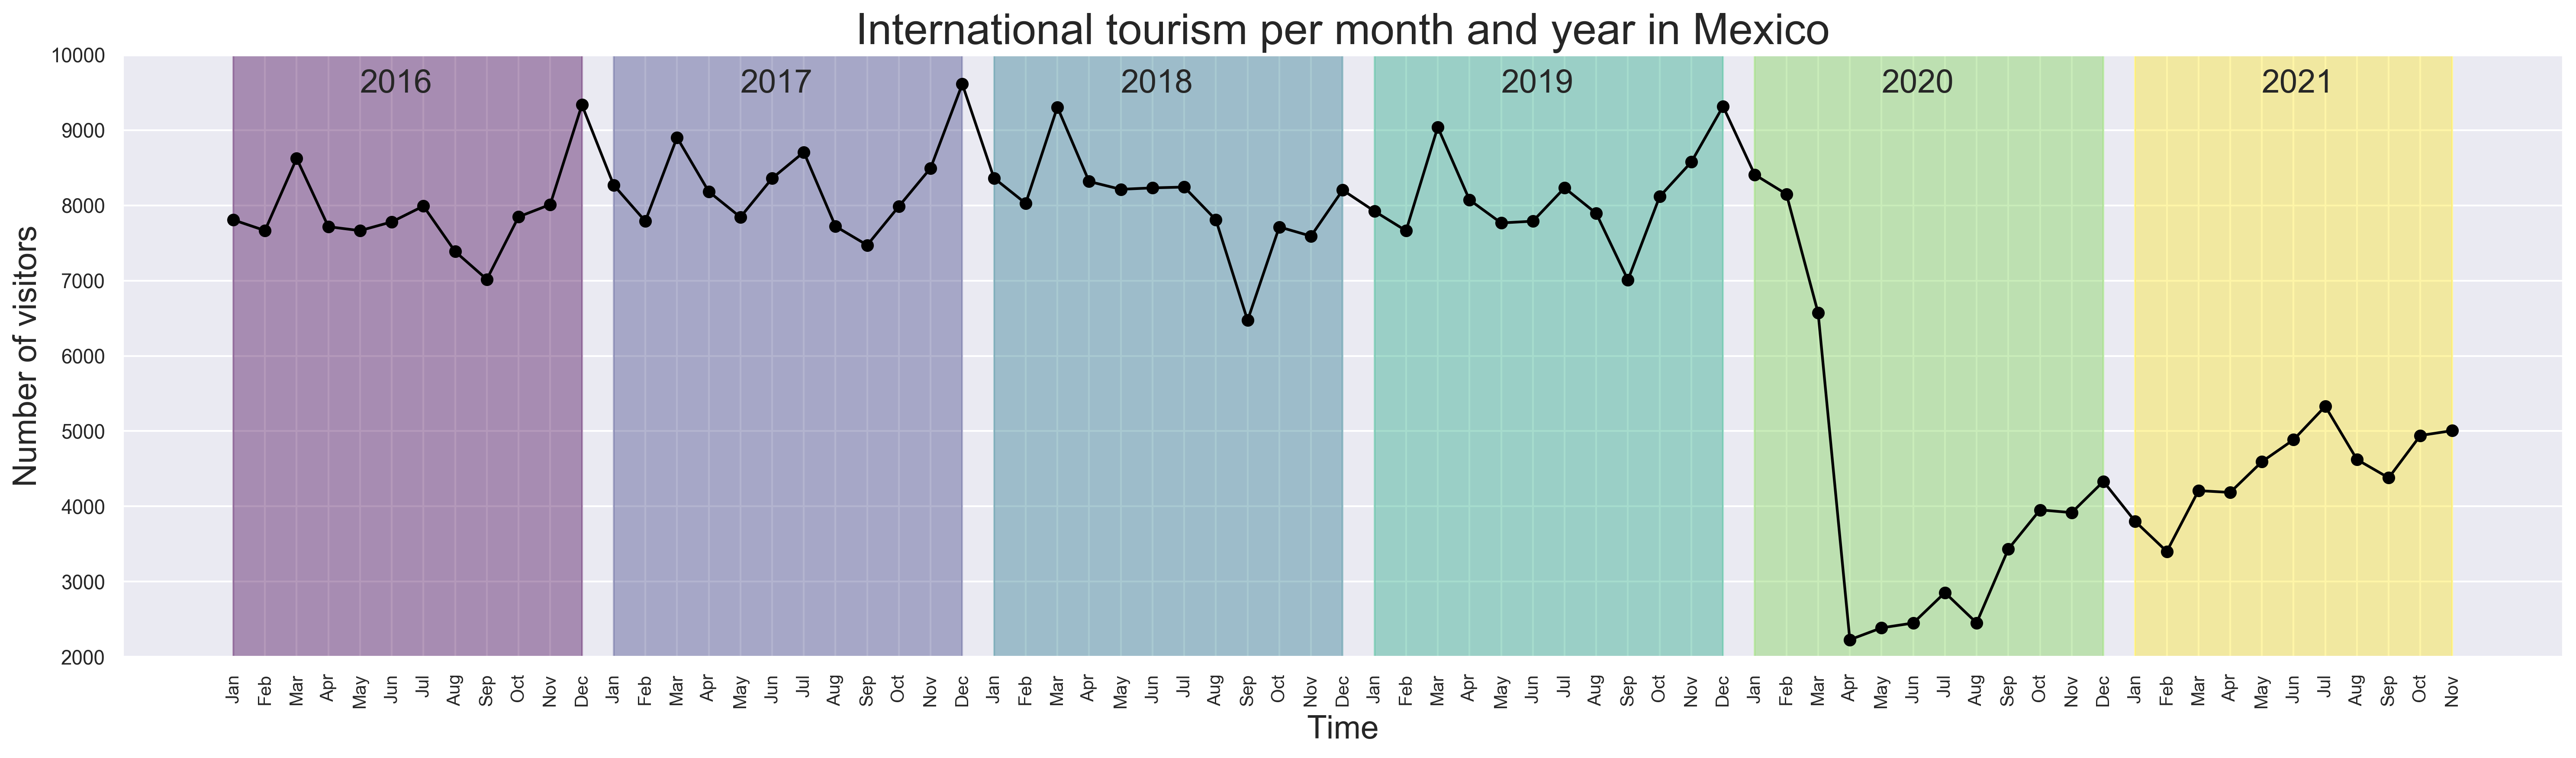

In [24]:
date = df_turismo['fecha']
vis = df_turismo['visitantes_internacionales']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
trans = 0.4

#plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(20, 6))
fig.set_tight_layout(True)
plt.plot_date(date, vis, linestyle='solid', color = 'black')

plt.title('International tourism per month and year in Mexico', fontsize = 24)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Number of visitors', fontsize = 18)
ax.set_ylim(2000,10000)
ax.axvspan('01/01/16', '01/12/16', color="#440154", alpha=trans)
ax.axvspan('01/01/17', '01/12/17', color="#414487", alpha=trans)
ax.axvspan('01/01/18', '01/12/18', color="#2a788e", alpha=trans)
ax.axvspan('01/01/19', '01/12/19', color="#22a884", alpha=trans)
ax.axvspan('01/01/20', '01/12/20', color="#7ad151", alpha=trans)
ax.axvspan('01/01/21', '01/11/21', color="#fde725", alpha=trans)
plt.xticks(rotation=90, fontsize = 10)
ax.set_xticks(range(len(df_turismo)))
ax.set_xticklabels(6*months)

year = 2016
initial = 4
for i in range(6):
    plt.text(initial + (i*12), 9500, str(year), fontsize=18)
    year += 1
#plt.savefig('Tourism per month and year.png')
plt.show()

#### Variation per month

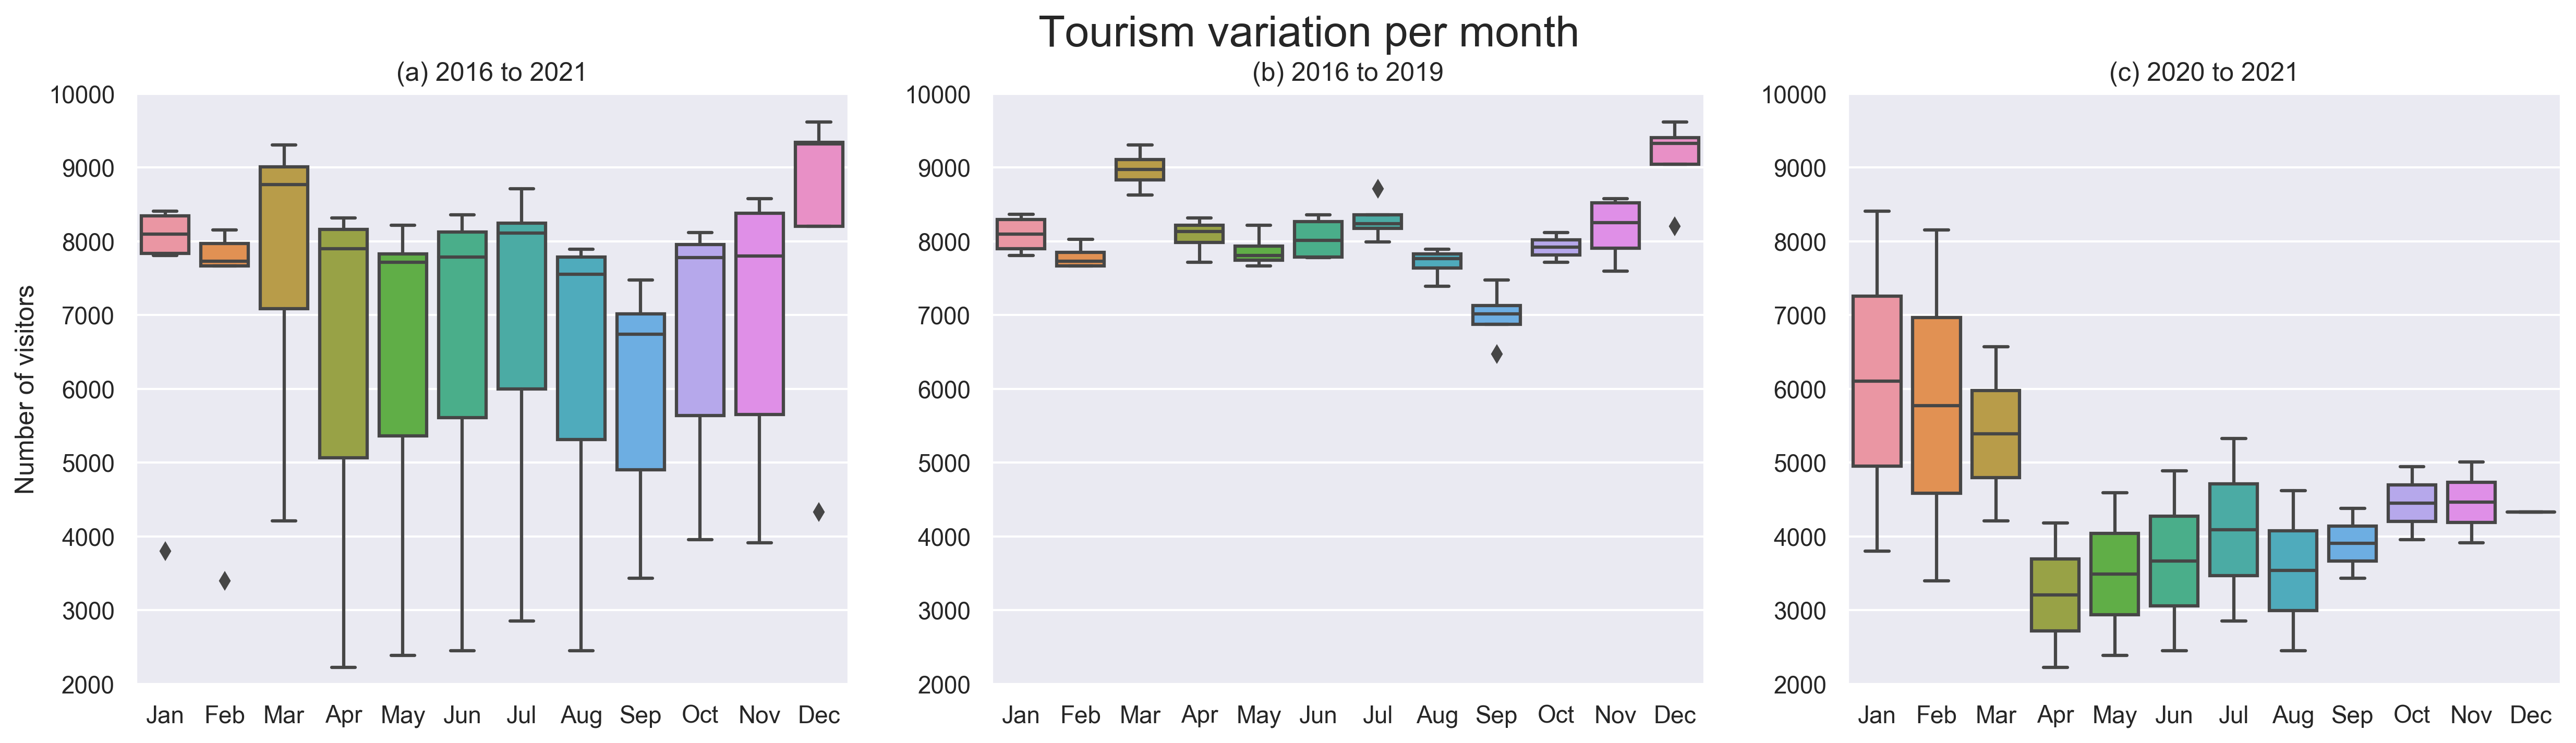

In [22]:
aa = df_turismo.groupby(['year', 'month'])['visitantes_internacionales'].sum().to_frame()
aa = aa.reset_index()


df_16to19 = aa.loc[(aa['year'] == '16') | (aa['year'] == '17') | (aa['year'] == '18') | (aa['year'] == '19')]
df_20to21 = aa.loc[(aa['year'] == '20') | (aa['year'] == '21')]

plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(1,3, sharex=True, figsize=(20,5))
fig.suptitle('Tourism variation per month', fontsize = 20)

sns.boxplot(x='month', y='visitantes_internacionales', data=aa, ax=axs[0])
sns.boxplot(x='month', y='visitantes_internacionales', data=df_16to19,ax=axs[1])
sns.boxplot(x='month', y='visitantes_internacionales', data=df_20to21,ax=axs[2])

for i in range(3):
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')        
    axs[i].set_ylim(2000,10000)
    
axs[0].set_title('(a) 2016 to 2021')
axs[1].set_title('(b) 2016 to 2019')
axs[2].set_title('(c) 2020 to 2021')
axs[0].set_ylabel('Number of visitors')

axs[0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.savefig('Tourism variation per month.png')
plt.show()


### 4. Creativity to communicate analytical results:
The Leadership team wants to know the number of Pueblos mágicos in each state. You, therefore, create an analysis. How would you communicate your results? Important: The leadership team has a non-technical background, so you might find data visualization techniques helpful. Elaborate a paragraph describing how to interpret your results and justify your answers. Data set: Pueblos mágicos de México.

There are different ways to visualize the number of pueblos mágicos in each state. In the following graph we can see the number of pueblos by state.

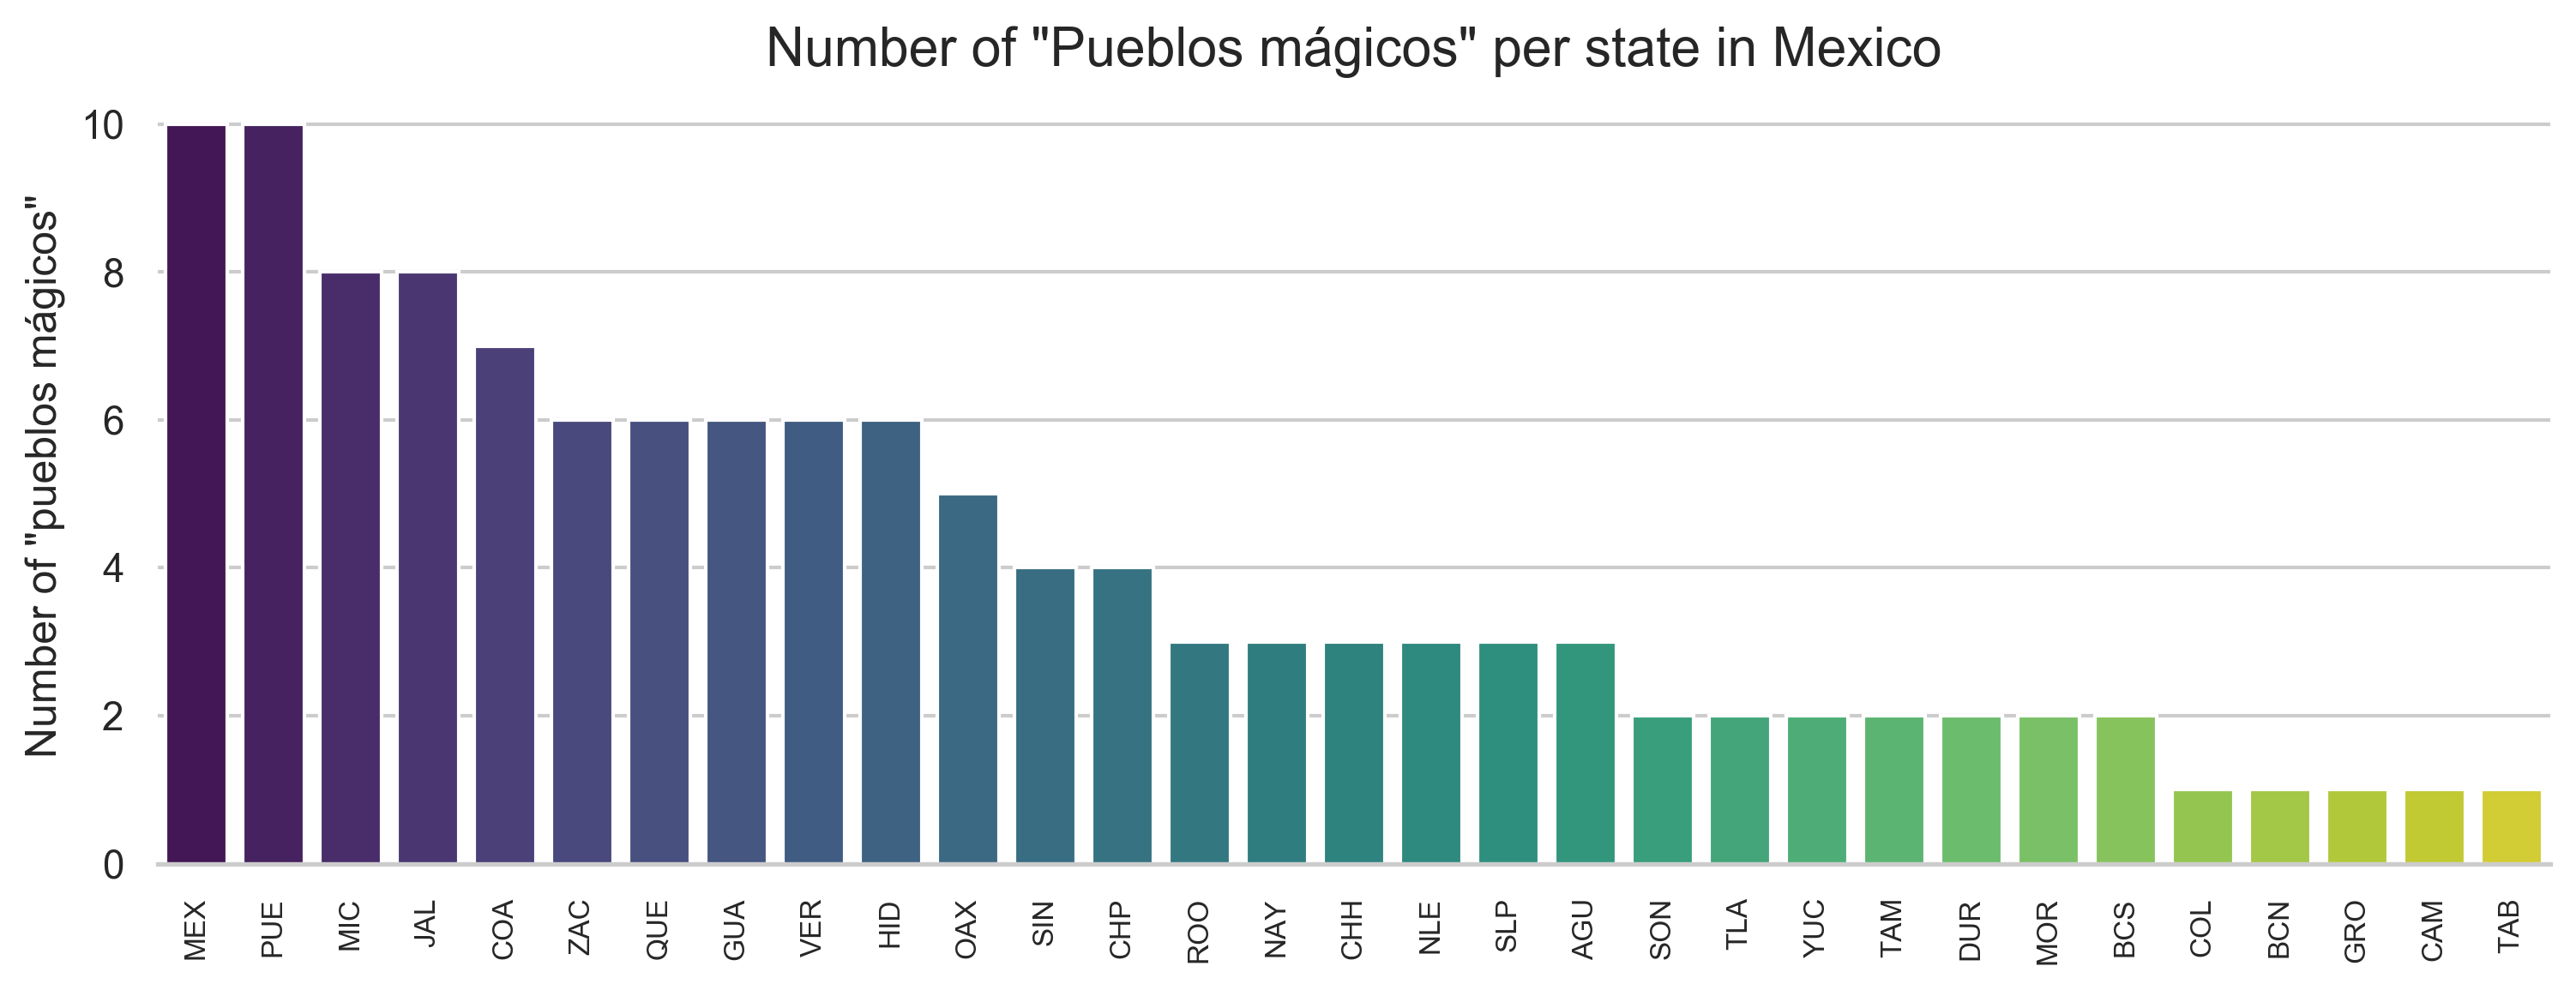

In [36]:
new_iso = df_pueblos['estado_iso'].value_counts().rename_axis('estado').reset_index(name='Number')

plt.rcParams['figure.dpi'] = 300
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,4))
p = sns.barplot(x = 'estado', y = 'Number', data = new_iso, palette = 'viridis')
plt.title('Number of "Pueblos mágicos" per state in Mexico', fontsize = 15);
plt.xlabel('')
plt.ylabel('Number of "pueblos mágicos"', fontsize = 12)
plt.xticks(rotation=90, fontsize = 8)
sns.despine(left=True)
plt.savefig('pueblos.png')
plt.show()

It can be seen that the states with the largest number of pueblos mágicos are the states of Mexico and Puebla, with 10 towns each. On the other hand, the states with the fewest towns are Colima, Baja California, Guerrero, Campeche and Tabasco, with 1 pueblo mágico each.

However, although this visualization is useful to know the number of pueblos mágicos in each state, it does not help us to understand geographically how the pueblos are distributed in Mexico. The following map allows us to visualize the geographical distribution of the pueblos mágicos, which can be very useful to know if there are regions in which the largest number of pueblos are concentrated, or to more easily visualize the regions in which it is sought to promote tourism, among many other functionalities.

In [37]:
df = pd.read_csv('MexicoData.csv')
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'  #archivo geojson
mx_regions_geo = requests.get(repo_url).json()

for i in range(len(mx_regions_geo['features'])):
    mx_regions_geo['features'][i]['properties']['name'] = unidecode.unidecode(mx_regions_geo['features'][i]['properties']['name'])  

In [38]:
new_df = df_pueblos['estado'].value_counts().rename_axis('estado').reset_index(name='Number')
fig = px.choropleth(data_frame = new_df,
                    geojson = mx_regions_geo,
                    locations = 'estado',
                    featureidkey = 'properties.name',
                    color = 'Number', 
                    color_continuous_scale = 'BuPu'
                    )
fig.update_geos(showcountries = False, showcoastlines = False, showland = False, fitbounds = 'locations')
fig.update_layout(
        title_text = 'Pueblos mágicos in Mexico',
        font = dict(
                family = 'Ubuntu',
                size = 18,
                color = 'black'
        ))
fig.show()